In [1]:
import tensorflow as tf
from tensorflow import keras

2022-12-06 21:05:43.844601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# from sklearn.model_selection import train_test_split

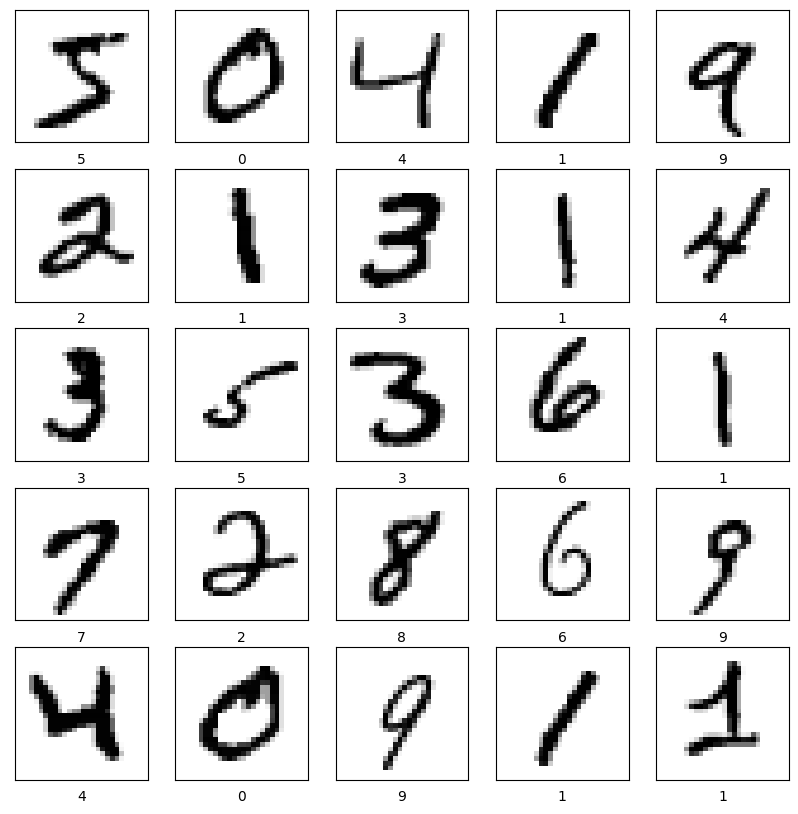

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#plot the images in the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()